In [1]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Baasic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
import datetime as dt
from math import radians, cos, sin, asin, sqrt

In [2]:
#### Loading the Data
data = pd.read_excel('Coporation_Favorica_Train.xlsx')
data = data[data.item_nbr==1]
data = data.drop('item_nbr',1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1142 entries, 0 to 4179
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1142 non-null   datetime64[ns]
 1   Quantity  1142 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 26.8 KB


In [3]:
data_fur = data

In [4]:
data_fur.info()
data_fur1 = data_fur.groupby(pd.Grouper(key='date', freq='1M')).sum()
#data_fur1=data_fur1.reset_index()
data_fur1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1142 entries, 0 to 4179
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1142 non-null   datetime64[ns]
 1   Quantity  1142 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 26.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2013-01-31 to 2017-08-31
Freq: M
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Quantity  56 non-null     int64
dtypes: int64(1)
memory usage: 896.0 bytes


<AxesSubplot:xlabel='date'>

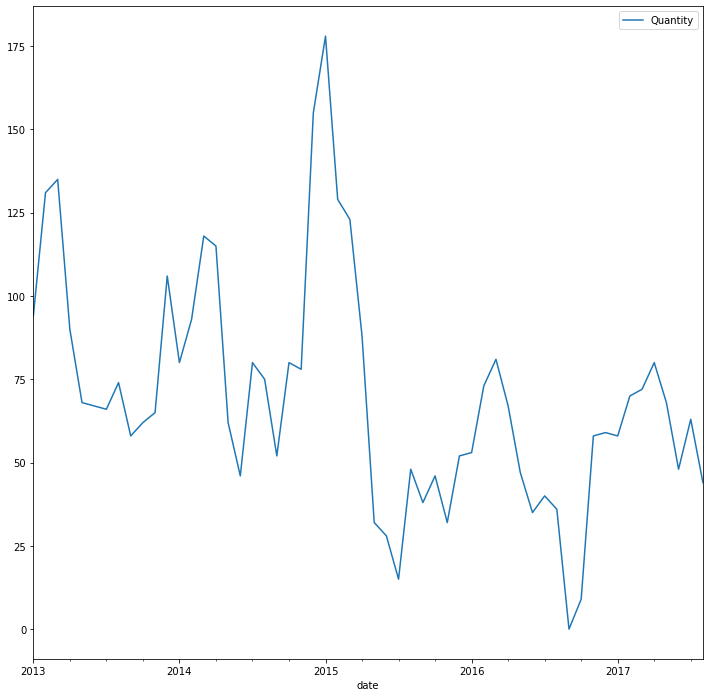

In [5]:
data_fur1.plot.line(y='Quantity')

In [6]:
data_fur1_train = data_fur1[:-9]
data_fur1_test = data_fur1[-9:]

In [9]:
# k_seasonal_diff=True, seasonal_periods=12 since there is a cycle every 12 months.
from statsmodels.tsa.statespace.tools import diff 
diff_data_fur1_train=diff(data_fur1_train, k_diff=0, k_seasonal_diff=True, seasonal_periods=12)
diff_data_fur1_train

,Quantity
date,
2014-01-31,-14.0
2014-02-28,-38.0
2014-03-31,-17.0
2014-04-30,25.0
2014-05-31,-6.0
2014-06-30,-21.0
2014-07-31,14.0
2014-08-31,1.0
2014-09-30,-6.0


<AxesSubplot:xlabel='date'>

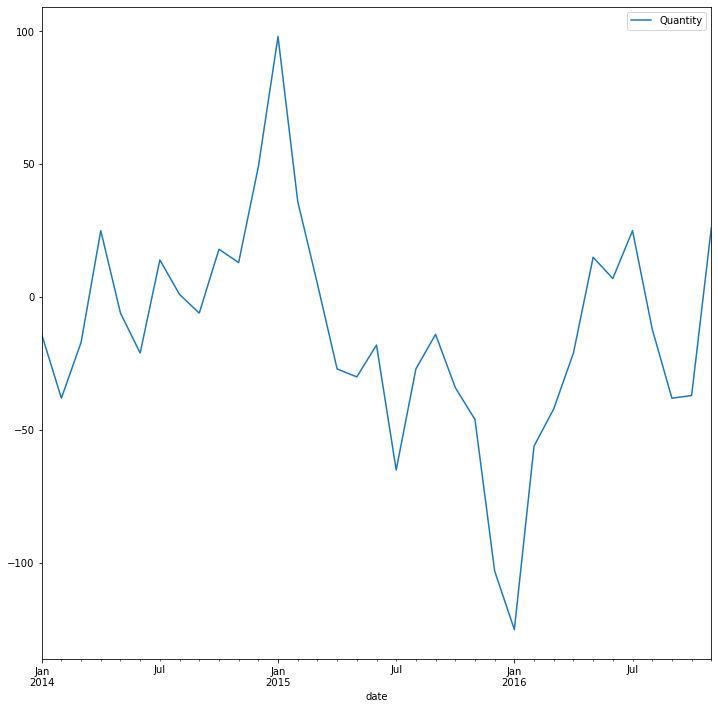

In [10]:
diff_data_fur1_train.plot.line(y='Quantity')

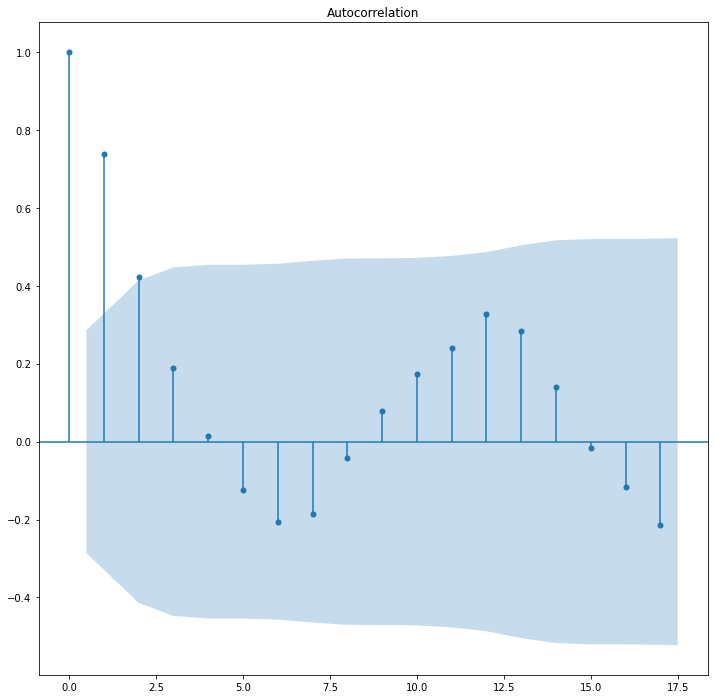

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_fur1_train['Quantity'])
plt.show()

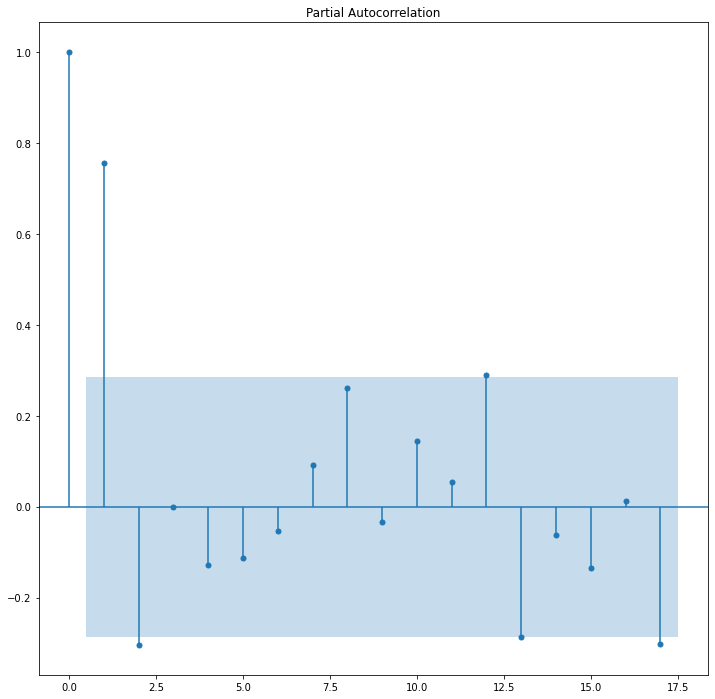

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_fur1_train['Quantity'])
plt.show()

In [29]:
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(data_fur1_train, order=(2,1,2),seasonal_order=(3,1,0,12))
res = mod.fit()
y_predict = res.forecast(9)

C:\Users\praca\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\praca\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\praca\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<ipython-input-30-878a4c358172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fur1_test['y_predict'] = y_predict


<AxesSubplot:xlabel='date'>

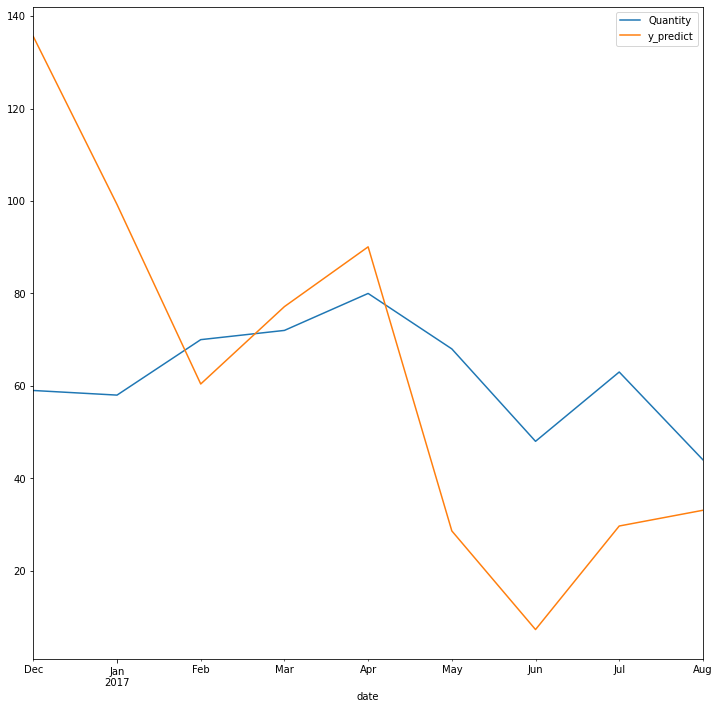

In [30]:
data_fur1_test['y_predict'] = y_predict
data_fur1_test[['Quantity','y_predict']].plot.line()

In [31]:
from sklearn.metrics import mean_squared_error
RMSE = sqrt(mean_squared_error(data_fur1_test.Quantity.values, y_predict))
print(RMSE)

36.86175482847864
